<a href="https://colab.research.google.com/github/AchmadFauzan312/Datmin-C2-K5-SIC21/blob/main/C2_K5_PA_DATMIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 5 :**

1. Achmad Fauzan (2109116117)

2. Aji Nashafa Azka AF (2109116106)

3. Ditha Tul Nugraha (2109116114)

#**A. SUPERVISED ALGORITMA KNN**

KNN


1. Adalah salah satu algoritma machine learning yang digunakan untuk klasifikasi dan regresi. Dalam KNN, untuk memprediksi label atau nilai target dari suatu data, algoritma mencari data terdekat yang memiliki label atau nilai target yang sama dengan data tersebut.

2. Secara sederhana, KNN bekerja dengan cara membandingkan suatu data dengan data lain dalam dataset untuk menentukan kelas atau nilai targetnya berdasarkan mayoritas dari k-nearest neighbors (tetangga terdekat) dari data tersebut. Jadi, jika k=3 misalnya, maka algoritma akan mencari 3 data terdekat dan menentukan kelas atau nilai target data yang akan diprediksi berdasarkan mayoritas dari ketiga data tersebut.

3. KNN memerlukan perhitungan jarak antara data dalam dataset, sehingga penting untuk memilih metrik jarak yang tepat seperti Euclidean distance atau cosine similarity. KNN juga membutuhkan pemilihan nilai k yang optimal, yang dapat dilakukan dengan menggunakan teknik cross-validation atau dengan mencoba beberapa nilai k yang berbeda dan memilih yang memberikan akurasi terbaik pada data yang diuji.




Supervised

Analisis Menggunakan STRUKTUR CRISP-DM

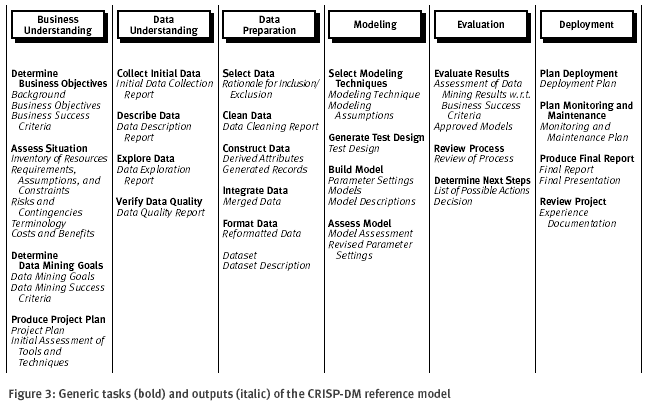

##1.Business Understanding

***Menurut Organisasi Kesehatan Dunia (WHO), stroke adalah penyebab kematian kedua di seluruh dunia, bertanggung jawab atas sekitar 11% dari total kematian. Dataset ini digunakan untuk memprediksi apakah seorang pasien kemungkinan akan mengalami stroke berdasarkan parameter input seperti jenis kelamin, usia, berbagai penyakit, dan status merokok. Setiap baris dalam data menyediakan informasi relevan tentang pasien.***

1. Dataset ini bertujuan untuk mengidentifikasi dan memprediksi penipuan kartu kredit dengan memprediksi apakah seorang pasien kemungkinan akan mengalami stroke berdasarkan parameter input seperti jenis kelamin, usia, berbagai penyakit, dan status merokok.
2. Model pembelajaran mesin yang dihasilkan dari dataset ini dapat digunakan oleh WHO dan lembaga kesehatan lainnya untuk secara otomatis mendeteksi dan mencegah penyakit stroke agar mengurangi persentase kematian yang terjadi.

**Tujuan Penggunaan Data Mining**

Tujuan penggunaan data mining ini untuk menentukan hubungan-hubungan atau pola yang mungkin memberikan indikasi yang bermanfaat.

##2.Data Understanding

**Persiapan Data**

In [1]:
#tabulasi dan analisis
import pandas as pd
#kalkulasi
import numpy as np
import math as math
#visualisasi
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
# Link diperlukan untuk sumber dataset
# Sumber Dataset : "https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset"
# link = "https://drive.google.com/drive/folders/1P-EjZmARp79zxNVo4Ebkk1dTIwaioR_W?usp=share_link"
# link_file = "https://drive.google.com/file/d/1jwSeGpO7tYoYP-3Ktgee0wiBh7qstbfC/view?usp=share_link"

###Collect Initial Data

In [3]:
#Membuat dataset
# df = pd.read_csv(link_file)
df = pd.read_csv('healthcare.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
#Menampilkan data 5 baris pertama
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
#Menampilkan data 5 baris terakhir
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
#Membuat Variabel
# Menampilkan dataset dengan label target F (Female)
df[df["gender"]=="Female"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [9]:
# Menampilkan dataset dengan label target bukan F (Female)
df[df["gender"] !="Female"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5097,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [10]:
# Menampilkan dataset untuk work type
df[df["work_type"]=="Private"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0


In [11]:
# Menampilkan data untuk jumlah pendapatan (avg_glucose_level) dibawah 166.29
df[df["avg_glucose_level"]<166.29]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [12]:
# Menampilkan data untuk jumlah pendapatan (avg_glucose_level) diatas 166.29
df[df["avg_glucose_level"]>166.29]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,68967,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,66684,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
df.select_dtypes(include=np.number)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [15]:
# Menampilkan nilai rata-rata, min, max, dan standar deviasi untuk kolom AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY	

def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())
  print("Nilai standar deviasi :", dfnum.std())
  print("Nilai mean            :", dfnum.mean())

In [16]:
tampil("id")

Nilai minimum         : 67
Nilai maksimum        : 72940
Nilai standar deviasi : 21161.721624827165
Nilai mean            : 36517.82935420744


In [17]:
tampil("age")

Nilai minimum         : 0.08
Nilai maksimum        : 82.0
Nilai standar deviasi : 22.61264672311349
Nilai mean            : 43.226614481409


In [18]:
tampil("hypertension")

Nilai minimum         : 0
Nilai maksimum        : 1
Nilai standar deviasi : 0.29660667423379117
Nilai mean            : 0.0974559686888454


In [19]:
tampil("heart_disease")

Nilai minimum         : 0
Nilai maksimum        : 1
Nilai standar deviasi : 0.22606298750336543
Nilai mean            : 0.05401174168297456


In [20]:
tampil("avg_glucose_level")

Nilai minimum         : 55.12
Nilai maksimum        : 271.74
Nilai standar deviasi : 45.28356015058198
Nilai mean            : 106.1476771037182


In [21]:
tampil("bmi")

Nilai minimum         : 10.3
Nilai maksimum        : 97.6
Nilai standar deviasi : 7.854066729680164
Nilai mean            : 28.893236911794666


In [22]:
tampil("stroke")

Nilai minimum         : 0
Nilai maksimum        : 1
Nilai standar deviasi : 0.2153198569802376
Nilai mean            : 0.0487279843444227


###Describe Data

1. Describe column
2. Describe data secara keseluruhan

In [23]:
# Menampilkan jumlah kolom dan jumlah baris
jumlah_kolom = df.shape[1]
jumlah_baris = df.shape[0]

print("Jumlah Kolom: ", jumlah_kolom)
print("Jumlah Baris: ", jumlah_baris)

Jumlah Kolom:  12
Jumlah Baris:  5110


**Describe Column**

Penjelasan mengenai kolom-kolom pada dataset

**Kolom target** pada dataset ini adalah kolom smoking_status

1. id: Nomor identifikasi unik untuk setiap pasien.
2. gender: Jenis kelamin pasien (Male/Female/Other).
3. age: Usia pasien dalam tahun.
4. hypertension: Apakah pasien menderita hipertensi atau tidak (1 jika iya, 0 jika tidak).
5. heart_disease: Apakah pasien menderita penyakit jantung atau tidak (1 jika iya, 0 jika tidak).
6. ever_married: Apakah pasien sudah menikah sebelumnya atau tidak (Yes/No).
7. work_type: Jenis pekerjaan pasien (Private/Govt_job/Self-employed/children/Never_worked).
8. Residence_type: Jenis tempat tinggal pasien (Urban/Rural).
9. avg_glucose_level: Rata-rata kadar glukosa dalam darah pasien dalam satuan mg/dL.
10. bmi: Indeks massa tubuh (BMI) pasien.
11. smoking_status: Status merokok pasien (formerly smoked/never smoked/smokes/Unknown).
12. stroke : Jumlah pasien yang pernah mengalami stroke

**Describe Data Secara Keseluruhan**

In [24]:
# Menampilkan data secara rinci
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [25]:
# Tampilkan info dataset (df.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [26]:
# Untuk lihat lebih jelas banyak kolom dan baris
df.shape

#Pada data ini terdapat 5110 baris dan 12 kolom

(5110, 12)

In [27]:
# Pada dataset terdapat 1892 yang tidak pernah merokok, 1544 tidak diketahui, 885 dahulu merokok dan 789 merokok.
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [28]:
# Menentukan kolom target
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

###Eksplore Data

Explore Data dilakukan dengan menggunakan Visualisasi Data. Visualisasi data adalah sebuah tahapan menampilkan data dalam bentuk visual. Tujuan utama dari tahap ini adalah untuk membuat gambaran besar data sehingga lebih mudah untuk dipahami.

In [29]:
# Tampilkan Data
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


####Visualisasi Comparison

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [31]:
# Membuat visualisasi yang menampilkan berapa banyak yang dahulu merokok, tidak pernah merokok, merokok, dan tidak diketahui.
px.histogram(df,x="smoking_status", color="smoking_status")

In [32]:
# Membuat visualisasi yang menampilkan berapa banyak yang dahulu merokok, tidak pernah merokok, merokok, dan tidak diketahui berdasarkan gender
px.histogram(df,x="gender",color="smoking_status")

In [33]:
# Membuat visualisasi yang menampilkan berapa banyak yang dahulu merokok, tidak pernah merokok, merokok, dan tidak diketahui berdasarkan work_type (Jenis Pekerjaan)
px.histogram(df,x="work_type",color="smoking_status")

####Penjelasan Visualisasi Comparison

1. Visualisasi yang menampilkan berapa banyak yang termasuk kedalam nama smoking_status (Status Merokok) untuk dahulu merokok, tidak pernah merokok, merokok, dan tidak diketahui. Pada visualisasi ini data yang ditampilkan dalam bentuk histogram. Tujuannya adalah agar dapat memudahkan dalam membaca informasi mengenai jumlah banyaknya kedalam nama smoking_status untuk dahulu merokok, tidak pernah merokok, merokok, dan tidak diketahui.

2. Visualisasi yang menampilkan berapa banyak yang termasuk kedalam nama smoking_status (Status Merokok) untuk dahulu merokok, tidak pernah merokok, merokok, dan tidak diketahui. Pada visualisasi ini jumlah data yang ditampilkan dalam bentuk histogram. Tujuannya adalah agar mengetahui berapa saja yang termasuk kedalam nama smoking_status untuk dahulu merokok, tidak pernah merokok, merokok, dan tidak diketahuinberdasarkan gender (Jenis Kelamin).

3. Visualisasi yang menampilkan berapa banyak yang termasuk kedalam nama smoking_status (Status Merokok) untuk dahulu merokok, tidak pernah merokok, merokok, dan tidak diketahui. Pada visualisasi ini jumlah data yang ditampilkan dalam bentuk histogram. Tujuannya adalah agar mengetahui berapa saja yang termasuk kedalam nama smoking_status untuk dahulu merokok, tidak pernah merokok, merokok, dan tidak diketahui berdasarkan work_type (Jenis Pekerjaan).

####Visualisasi Distribution

In [34]:
# Tampilkan Data
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [35]:
# Membuat historgram bmi (Berat Badan)	
px.histogram(df,x="bmi")

In [36]:
# Membuat historgram avg_glucose_level (kadar glukosa rata-rata)	
px.histogram(df,x="avg_glucose_level")

In [37]:
# Membuat Boxplot bmi (Berat Badan)
px.box(df,x="bmi")

In [38]:
# Membuat Boxplot avg_glucose_level (Kadar glukosa rata-rata)
px.box(df,x="avg_glucose_level")

####Penjelasan Visualisasi Distribution



1.   Menunjukkan korelasi dalam bentuk Boxplot dalam hubungan antara kadar glukosa rata-rata dengan nilai bmi (Berat Badan)




####Visualisasi Relationship

In [39]:
# Scatterplot untuk age dan bmi (Berat Badan)
px.scatter(df,x="bmi",color="age",title="Scatterplot bmi dan age")

####Penjelasan Visualisasi Relationship



1.   Menunjukkan korelasi dalam bentuk Scatterplot dalam hubungan antara nilai age (umur) dengan nilai bmi (Berat Badan)




####Visualisasi Composition

In [40]:
# Menampilkan data
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [41]:
# Pieplot untuk work_type
px.pie(df,names="work_type",title="Diagram Pie work_type")

In [42]:
# Pieplot untuk smoking_status
px.pie(df,names="smoking_status",title="Diagram Pie smoking_status")

####Penjelasan Visualisasi Composition



1.   Menunjukkan korelasi smoking status dalam bentuk Pieplot 




<Axes: xlabel='age', ylabel='gender'>

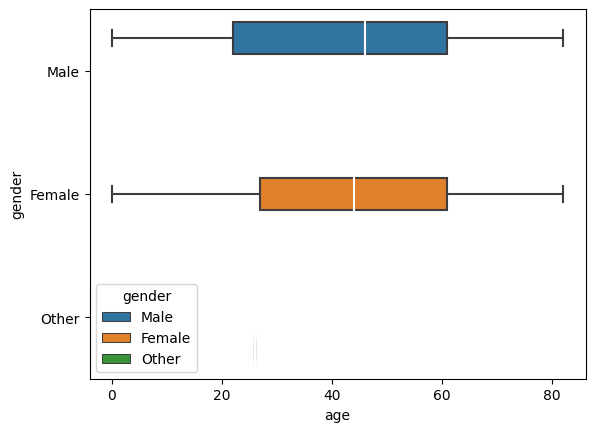

In [43]:
# Membuat visualisasi boxplot age dengan gender sebagai pemisahnya (color)
sns.boxplot(
    data=df, x="age", y="gender", hue="gender",
    medianprops={"color" : "white"}
)

<Axes: xlabel='age', ylabel='work_type'>

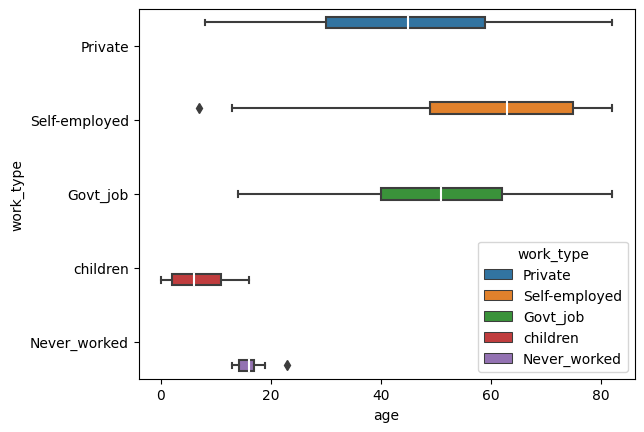

In [44]:
# Membuat visualisasi boxplot age dengan work_type sebagai pemisahnya (color)
sns.boxplot(
    data=df, x="age", y="work_type", hue="work_type",
    medianprops={"color" : "white"}
)

<Axes: xlabel='Residence_type', ylabel='count'>

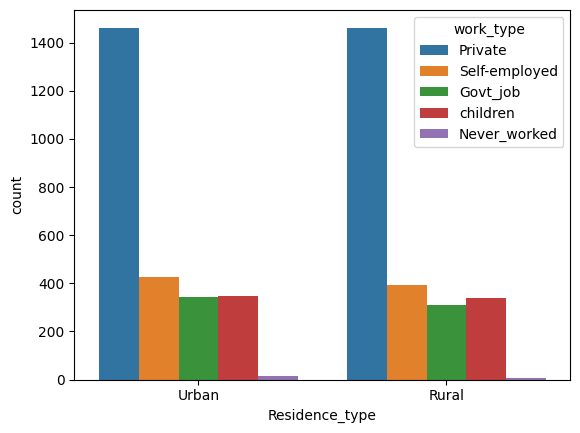

In [45]:
# Membuat visualisasi countplot Residence_type dengan work_type sebagai pemisahnya (color)
sns.countplot(data=df,x="Residence_type",hue="work_type")

##3.Data Preparation

Data preparation adalah proses mempersiapkan raw data agar dapat digunakan dalam proses analisis nantinya. Tahapan-tahapan penting dalam data preparation meliputi :
1. Select Data
2. Clean Data
3. Construct Data
4. Integrate Data
5. Format Data

###Select Data

In [46]:
# Membuat hanya menampikan 2 Kolom yaitu age dan gender
selected_data = df[["age", "gender"]]

# Menampilkan Perintah
print(selected_data.head())

    age  gender
0  67.0    Male
1  61.0  Female
2  80.0    Male
3  49.0  Female
4  79.0  Female


In [47]:
# Membuat hanya menampikan 3 Kolom yaitu work_type, age, dan gender
selected_data = df[["work_type", "age", "gender"]]

# Menampilkan Perintah
print(selected_data.head())

       work_type   age  gender
0        Private  67.0    Male
1  Self-employed  61.0  Female
2        Private  80.0    Male
3        Private  49.0  Female
4  Self-employed  79.0  Female


In [48]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [49]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


###Cleaning Data

In [50]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [51]:
len(df)

5110

In [52]:
df.isna().sum() / len(df) * 100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [53]:
# Tujuannya agar saat menghapus data masih bisa di backup
df2 = df.copy(deep=True) 

In [54]:
df_dropna = df.dropna()

In [55]:
df_dropna.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Setelah mengatasi missing value, selanjutnya menghapus kolom yang tidak perlu.

In [56]:
df_dropna

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<Axes: >

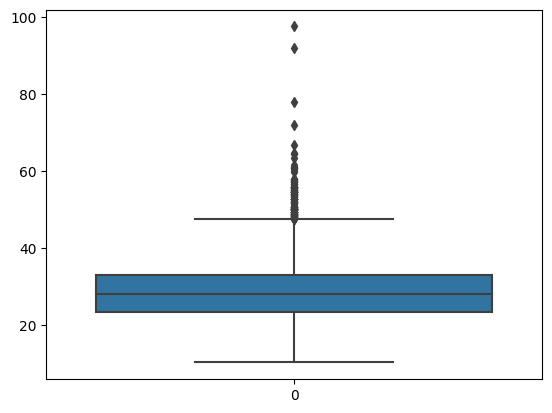

In [57]:
sns.boxplot(df_dropna.bmi)

###Outlier

In [58]:
# Outlier
# Batas atas Q3 + 1.5*IQR
# IQR = Q3-Q1

q3 = df_dropna.bmi.quantile(0.75)
q1 = df_dropna.bmi.quantile(0.25)
iqr = q3 - q1
ba = q3 + (1.5*iqr)
bw = q1 - (1.5*iqr)

print(q3,q1,iqr,ba,bw)

33.1 23.5 9.600000000000001 47.5 9.099999999999998


In [59]:
df_dropna[(df_dropna.bmi > ba) | (df.bmi < bw)]

<ipython-input-59-0593749fb1a1>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4858,1696,Female,43.0,0,0,Yes,Private,Urban,100.88,47.6,smokes,0
4906,72696,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,16245,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,40732,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0


In [60]:
126/len(df_dropna)*100

2.566714198411082

In [61]:
# Karena ga diatas 5 persen kita bisa hapus data nya
df3 = df_dropna[~((df_dropna.bmi > ba) | (df.bmi < bw))]

<ipython-input-61-1b4926fea229>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<Axes: >

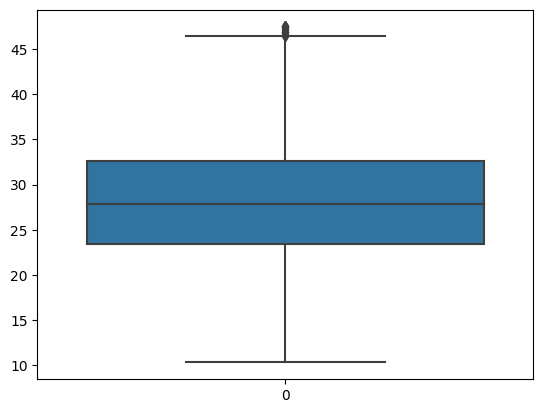

In [62]:
sns.boxplot(df3.bmi)

###Construct Data

In [63]:
df_dropna

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [64]:
# Menghapus kolom-kolom yang tidak diperlukan
df = df_dropna.drop(['id'], axis=1)
df = df_dropna.drop(['Residence_type'], axis=1)

In [65]:
# Buat fitur baru yang menghitung selisih nilai maksimum dan minimum 
df["age"]

0       67.0
2       80.0
3       49.0
4       79.0
5       81.0
        ... 
5104    13.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 4909, dtype: float64

In [66]:
# Menampilkan beberapa baris pertama dari kumpulan data yang dimodifikasi
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type  avg_glucose_level   bmi   smoking_status  stroke  
0        Private             228.69  36.6  formerly smoked       1  
2        Private             105.92  32.5     never smoked       1  
3        Private             171.23  34.4           smokes       1  
4  Self-employed             174.12  24.0     never smoked       1  
5        Private             186.21  29.0  formerly smoked       1  


In [67]:
# Menampilkan lima baris pertama dari dataset yang telah diproses
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type  avg_glucose_level   bmi   smoking_status  stroke  
0        Private             228.69  36.6  formerly smoked       1  
2        Private             105.92  32.5     never smoked       1  
3        Private             171.23  34.4           smokes       1  
4  Self-employed             174.12  24.0     never smoked       1  
5        Private             186.21  29.0  formerly smoked       1  


###Integrate Data

In [68]:
# Melakukan perubahan pada nilai data tertentu
df.loc[df['age'] == 'nilai_awal', 'age'] = 'nilai_baru'

# Menyimpan dataset yang telah diubah
df.to_csv('new data.csv', index=False)

print("Berhasil membuat dataset baru dan menambahkan 1 kolom baru")

Berhasil membuat dataset baru dan menambahkan 1 kolom baru


In [69]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,166.29,25.6,formerly smoked,0


###Format Data

In [70]:
# Menampilkan jumlah kolom dan jumlah baris
jumlah_kolom = df.shape[1]
jumlah_baris = df.shape[0]

print("Jumlah Kolom: ", jumlah_kolom)
print("Jumlah Baris: ", jumlah_baris)

Jumlah Kolom:  11
Jumlah Baris:  4909


In [71]:
# Mengganti nilai null dengan nilai rata-rata
mean_value = df['age'].mean()
df['age'] = df['age'].fillna(mean_value)

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,166.29,25.6,formerly smoked,0


In [72]:
# Mengubah tipe avg_glucose_level dari string ke integer
df['avg_glucose_level'] = df['avg_glucose_level'].astype(int)

In [73]:
# Menghapus baris yang duplikat
df = df.drop_duplicates()

In [74]:
# Mengurutkan data berdasarkan kolom
df = df.sort_values('age')

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
3295,29955,Male,0.08,0,0,No,children,70,16.9,Unknown,0
1614,47350,Female,0.08,0,0,No,children,139,14.1,Unknown,0
3968,41500,Male,0.16,0,0,No,children,69,13.0,Unknown,0
3618,22877,Male,0.16,0,0,No,children,114,17.4,Unknown,0
4021,8247,Male,0.16,0,0,No,children,109,13.9,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
3400,38078,Female,82.00,1,1,Yes,Private,73,33.5,never smoked,0
2979,57494,Female,82.00,1,0,Yes,Self-employed,107,27.0,formerly smoked,0
3422,34543,Female,82.00,0,0,Yes,Self-employed,84,25.7,Unknown,0
1068,24437,Female,82.00,0,0,Yes,Private,96,26.5,Unknown,0


In [75]:
# Menyimpan hasil pengolahan data ke file csv
df.to_csv('data_cleaned.csv', index=False)

###Encoding

In [76]:
# Merubah tipe data string/kategori menjadi numerik menggunakan label encoding
from sklearn.preprocessing import LabelEncoder
modeling = pd.read_csv ("data_cleaned.csv")
label_encoder = LabelEncoder()
# Honda = 0, Yamaha = 1
modeling['gender'] = label_encoder.fit_transform(modeling['gender'])
modeling['work_type'] = label_encoder.fit_transform(modeling['work_type'])
modeling['ever_married'] = label_encoder.fit_transform(modeling['ever_married'])
modeling['smoking_status'] = label_encoder.fit_transform(modeling['smoking_status'])

modeling

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,29955,1,0.08,0,0,0,4,70,16.9,0,0
1,47350,0,0.08,0,0,0,4,139,14.1,0,0
2,41500,1,0.16,0,0,0,4,69,13.0,0,0
3,22877,1,0.16,0,0,0,4,114,17.4,0,0
4,8247,1,0.16,0,0,0,4,109,13.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4904,38078,0,82.00,1,1,1,2,73,33.5,2,0
4905,57494,0,82.00,1,0,1,3,107,27.0,1,0
4906,34543,0,82.00,0,0,1,3,84,25.7,0,0
4907,24437,0,82.00,0,0,1,2,96,26.5,0,0


In [77]:
df3 = modeling
df3.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##4.Modeling

###Pre Processing

In [78]:
import numpy as np
import pandas as pd
import math as sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.model_selection import train_test_split

###Train-test Split

In [79]:
# Split dataset
from sklearn.model_selection import train_test_split
X = df3.drop('gender', axis=1) # Feature
y = df3['gender'] # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# x_train: Untuk menampung data source yang akan dilatih.
# x_test: Untuk menampung data target yang akan dilatih.
# y_train: Untuk menampung data source yang akan digunakan untuk testing.
# y_test: Untuk menampung data target yang akan digunakan untuk testing.

# x dan y adalah nama variabel yang digunakan saat mendefinisikan data source dan data target. 
# Parameter test_size digunakan untuk mendefinisikan ukuran data testing. 
# Dalam contoh di atas, test_size=0.2 berarti data yang digunakan sebagai data testing adalah sebesar 20% dari keseluruhan dataset.

In [80]:
# Ini untuk pengukuran matriknya
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,roc_auc_score,confusion_matrix
from sklearn.model_selection import KFold,StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

In [81]:
# Melakukan scaling pada data train
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)

x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=X_train.columns)

# Gunakan objek scaler yang sama untuk melakukan scaling pada data test
x_test_scaled = scaler.transform(X_test)

x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=X_test.columns)

###KNN

In [82]:
# Inisialisasi model KNN dengan k=15
knn = KNeighborsClassifier(n_neighbors=15)
# Train model menggunakan data train
knn.fit(x_train_scaled_df, y_train)

# Prediksi label pada data test
knn_pred = knn.predict(x_test_scaled_df)

In [83]:
# Split dataset into features (X) and labels (y)
X = modeling.iloc[:, :-1].values
y = modeling.iloc[:, -1].values

# Normalize the features
for i in range(X.shape[1]):
    X[:, i] = (X[:, i] - np.min(X[:, i])) / (np.max(X[:, i]) - np.min(X[:, i]))

# Define KNN function
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = math.sqrt(sum([(X_test[i][m] - X_train[j][m]) ** 2 for m in range(len(X_test[i]))]))
            distances.append((dist, j))
        distances.sort()
        neighbors = [y_train[distances[m][1]] for m in range(k)]
        y_pred.append(max(set(neighbors), key=neighbors.count))
    return y_pred

In [84]:
# Inisialisasi model KNN dengan k=15
knn = KNeighborsClassifier(n_neighbors=15)
# Train model menggunakan data train
knn.fit(x_train_scaled, y_train)

# Prediksi label pada data test
knn_pred = knn.predict(x_test_scaled)

###Naive Bayes

In [85]:
# definisikan model Naive Bayes
gnb = GaussianNB()

# Gunakan objek scaler yang sama untuk melakukan scaling pada data test
x_test_scaled = scaler.transform(X_test)

# latih model Naive Bayes
gnb.fit(x_train_scaled_df, y_train)

# evaluasi performa model menggunakan data uji
gnb_pred = gnb.predict(x_test_scaled_df)

###C4.5

In [86]:
# inisialisasi model Decision Tree Classifier
dtc = DecisionTreeClassifier()

# train model pada data train
dtc.fit(x_train_scaled_df, y_train)

# evaluasi model pada data test
dtc_pred = dtc.predict(x_test_scaled_df)

In [87]:
# inisialisasi model decision tree dengan algoritma C4.5
dtc = DecisionTreeClassifier(criterion='entropy')

# melatih model dengan data training
dtc.fit(X_train, y_train)

# melakukan prediksi dengan data testing
y_pred = dtc.predict(X_test)

# menghitung akurasi dari model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi C45: {:.2f}%".format(accuracy*100))

Akurasi C45: 57.94%


##5.Evaluation

Evaluasi pada analisis ini akan dilakukan menggunakan confusion matrix. Confusion matrix merupakan sebuah matriks yang digunakan untuk mengevaluasi kinerja model klasifikasi dengan membandingkan nilai aktual dan prediksi dari suatu model. Terdapat empat nilai dalam confusion matrix, yaitu True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN). Dari nilai-nilai ini, kita dapat menghitung akurasi, presisi, dan recall. Akurasi merupakan rasio prediksi yang benar dari semua prediksi. Presisi merupakan rasio prediksi yang benar positif dari semua prediksi positif. Recall merupakan rasio prediksi yang benar positif dari semua kasus positif yang sebenarnya. 

Apabila hasil dari akurasi, presisi, dan recall mendekati 1, maka akan semakin baik kinerja model yang digunakan.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

<ipython-input-88-a231f0f488c2>:35: RuntimeWarning:

invalid value encountered in long_scalars



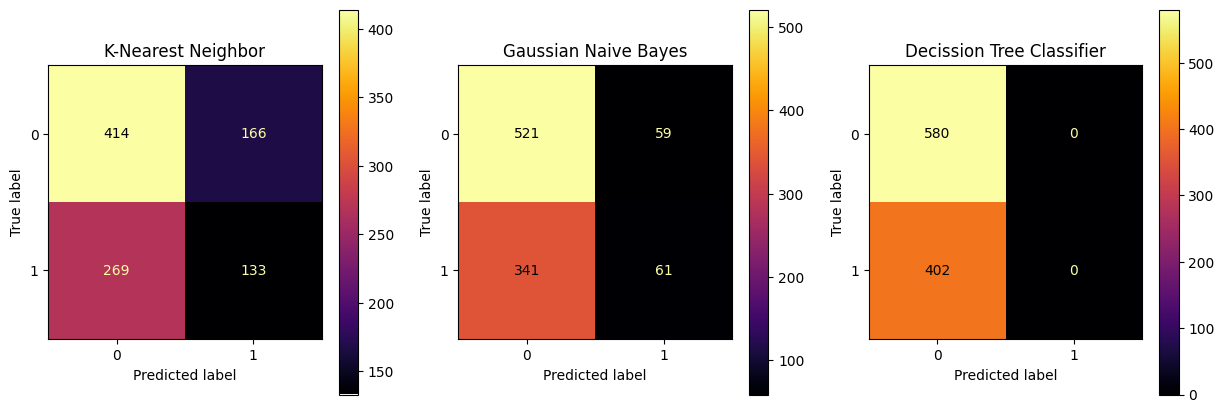

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
K-Nearest Neighbor,55.702648,44.481605,33.084577,52.231944,37.945792
Gaussian Naive Bayes,59.266802,50.833333,15.174129,52.500858,23.371648
Decission Tree Classifier,59.063136,nan,0.000000,50.000000,nan


In [88]:
# buat list model dan nama model
models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes','Decission Tree Classifier']

# inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# loop untuk setiap model
for i, model in enumerate(models):
    # prediksi target variabel pada data uji
    y_pred = model.predict(x_test_scaled)

    # hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
    
    # hitung precision dan recall
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = 2*pr*rc / (pr+rc)

    # simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# tampilkan visualisasi
plt.show()

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)

# tampilkan dataframe
display(df_eval)

##6.Deployment

In [89]:
# Export df yang belum di encoding
df2
df.to_csv("output.csv")

#**B.UNSUPERVISED ALGORITMA K-MEANS**

Analisis Menggunakan STRUKTUR CRISP-DM

<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

K-MEANS

1. K-means merupakan salah satu algoritma yang bersifat unsupervised learning. K-Means memiliki fungsi untuk mengelompokkan data kedalam data cluster. Algoritma ini dapat menerima data tanpa ada label kategori. K-Means Clustering Algoritma juga merupakan metode non-hierarchy.

2. Algoritma ini bekerja dengan cara menginisialisasi K pusat kelompok secara acak, lalu mengelompokkan setiap data ke pusat kelompok terdekat.

3. Setelah itu, algoritma akan menghitung ulang pusat kelompok berdasarkan rata-rata data dalam setiap kelompok, dan proses pengelompokkan akan diulang hingga konvergen atau sudah mencapai batas iterasi maksimal yang ditentukan.

4. Salah satu metode untuk menentukan jumlah cluster terbaik adalah metode elbow, yang mencari nilai K di mana penurunan inertia mulai menurun drastis. Inertia merupakan ukuran jarak antara setiap data ke pusat kelompoknya. Semakin kecil inertia, semakin baik clusteringnya.

##1.Business Understanding

Data ini merupakan hasil dari analisis kimia pada wine yang ditanam di wilayah yang sama di Italia, tetapi berasal dari tiga kultivar yang berbeda. Analisis tersebut menentukan jumlah dari 13 kandungan yang ditemukan dalam setiap jenis wine.

**Goals**

Analisis pada wine ini dilakukan untuk:
1. Menemukan pola-pola yang terdapat pada data dan membagi data tersebut menjadi beberapa kelompok atau cluster berdasarkan kemiripan karakteristiknya. Dengan melakukan clustering pada data, kita dapat mengidentifikasi kelompok-kelompok anggur yang memiliki karakteristik yang serupa dalam hal komposisi kimia, sehingga dapat membantu dalam memahami lebih lanjut mengenai sifat dan karakteristik dari anggur tersebut. Selain itu, clustering pada data juga dapat membantu dalam pengambilan keputusan di bidang industri anggur, seperti dalam hal produksi dan pemasaran produk, serta membantu dalam pengembangan strategi bisnis.
2. Analisis menentukan jumlah 13 zat yang ditemukan di masing-masing dari tiga jenis anggur.
3. mengelompokkan anggur berdasarkan konsentrasi 13 komponen kimianya.


Terdapat 13 fitur pada dataset, yaitu:

1. Alcohol
2. Malic_Acid
3. Ash
4. Ash_Alcanity
5. Magnesium
6. Total_Phenols
7. Flavanoids
8. Nonflavanoid_Phenols
9. Proanthocyanins
10. Color_Intensity
11. Hue
12. OD280
13. Proline
**Tujuan Penggunaan Data Mining**

Untuk memodelkan struktur data pada dataset wine sehingga dapat mempelajari data-data tersebut lebih lanjut lagi.

##2.Data Understanding

**Persiapan Data**

In [90]:
# Untuk tabulasi dan analisis
import pandas as pd

# Untuk kalkulasi
import numpy as np

# Untuk visualisasi
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [91]:
# Fungsi untuk melihat persentase data terisi dan kosong
def null_ratio(df, limit=-1):
  percent_missing = df.isnull().sum() * 100 / len(df2)
  df_result = pd.DataFrame({
      "filled":df.notnull().sum(),
      "N null":df.isna().sum(),
      "null_ratio(%)":percent_missing,
  })
  nr = df_result.sort_values("null_ratio(%)",ascending=False)
  return nr[nr["null_ratio(%)"] > limit]

In [92]:
import pandas as pd
df = pd.read_csv('wine-clustering.csv')

In [93]:
# Link diperlukan untuk sumber dataset
# Sumber Dataset : "https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering"
# link = "https://drive.google.com/drive/folders/1P-EjZmARp79zxNVo4Ebkk1dTIwaioR_W?usp=share_link"
# link_file = "https://drive.google.com/file/d/1uVqsnAaDDSWBcrmDd3MXTLrhgmmKgshz/view?usp=share_link"

In [94]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


###a. Collect Initial Data

In [95]:
#Collect initial data
df2 = pd.read_csv('wine-clustering.csv')

In [96]:
df2

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


###b. Describe Data

1. Describe column
2. Describe data secara keseluruhan

####1) Describe Column

Dataset yang dimaksud adalah Wine Dataset for Clustering yang terdapat di Kaggle. Dataset ini terdiri dari 178 baris dan 13 kolom numerik yang mewakili jumlah 13 komponen kimia yang terkandung dalam tiga jenis anggur yang berasal dari Italia. Dataset ini digunakan untuk tujuan pembelajaran tanpa pengawasan atau clustering.

Berikut adalah deskripsi singkat tentang kolom-kolom dalam dataset ini:

1. Alcohol: konsentrasi alkohol dalam anggur (%)
2. Malic acid: konsentrasi asam malat dalam anggur (g/l)
3. Ash: jumlah abu dalam anggur (g/l)
4. Alcalinity of ash: derajat keasaman abu dalam anggur
5. Magnesium: konsentrasi magnesium dalam anggur (mg/l)
6. Total phenols: jumlah total fenol dalam anggur (mg/l)
7. Flavanoids: jumlah flavonoid dalam anggur (mg/l)
8. Nonflavanoid phenols: jumlah non-flavonoid fenol dalam anggur (mg/l)
9. Proanthocyanins: jumlah proantosianidin dalam anggur (mg/l)
10. Color intensity: intensitas warna dalam anggur
11. Hue: kecerahan warna dalam anggur
12. OD280: rasio absorbansi anggur pada 280 nm dan 315 nm
13. Proline: konsentrasi prolin dalam anggur (mg/l)

####2) Describe All Data

**Describe Data Secara Keseluruhan**

In [97]:
# Menampilkan data 5 baris pertama
df2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [98]:
# Menampilkan data 5 baris terakhir
df2.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [99]:
# Mlihat lebih jelas jumlah kolom dan baris
df2.shape

#Pada data ini terdapat 178 baris dan 13 kolom

(178, 13)

In [100]:
# Melihat tipe data pada setiap fitur
df2.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [101]:
# Cek nilai yang hilang
df2.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [102]:
# Cek statistik deskriptif secara rinci
df2.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [103]:
# Menampilkan info dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


###c. Explore Data

####1) Visualisasi Comparison

<Axes: xlabel='Alcohol', ylabel='count'>

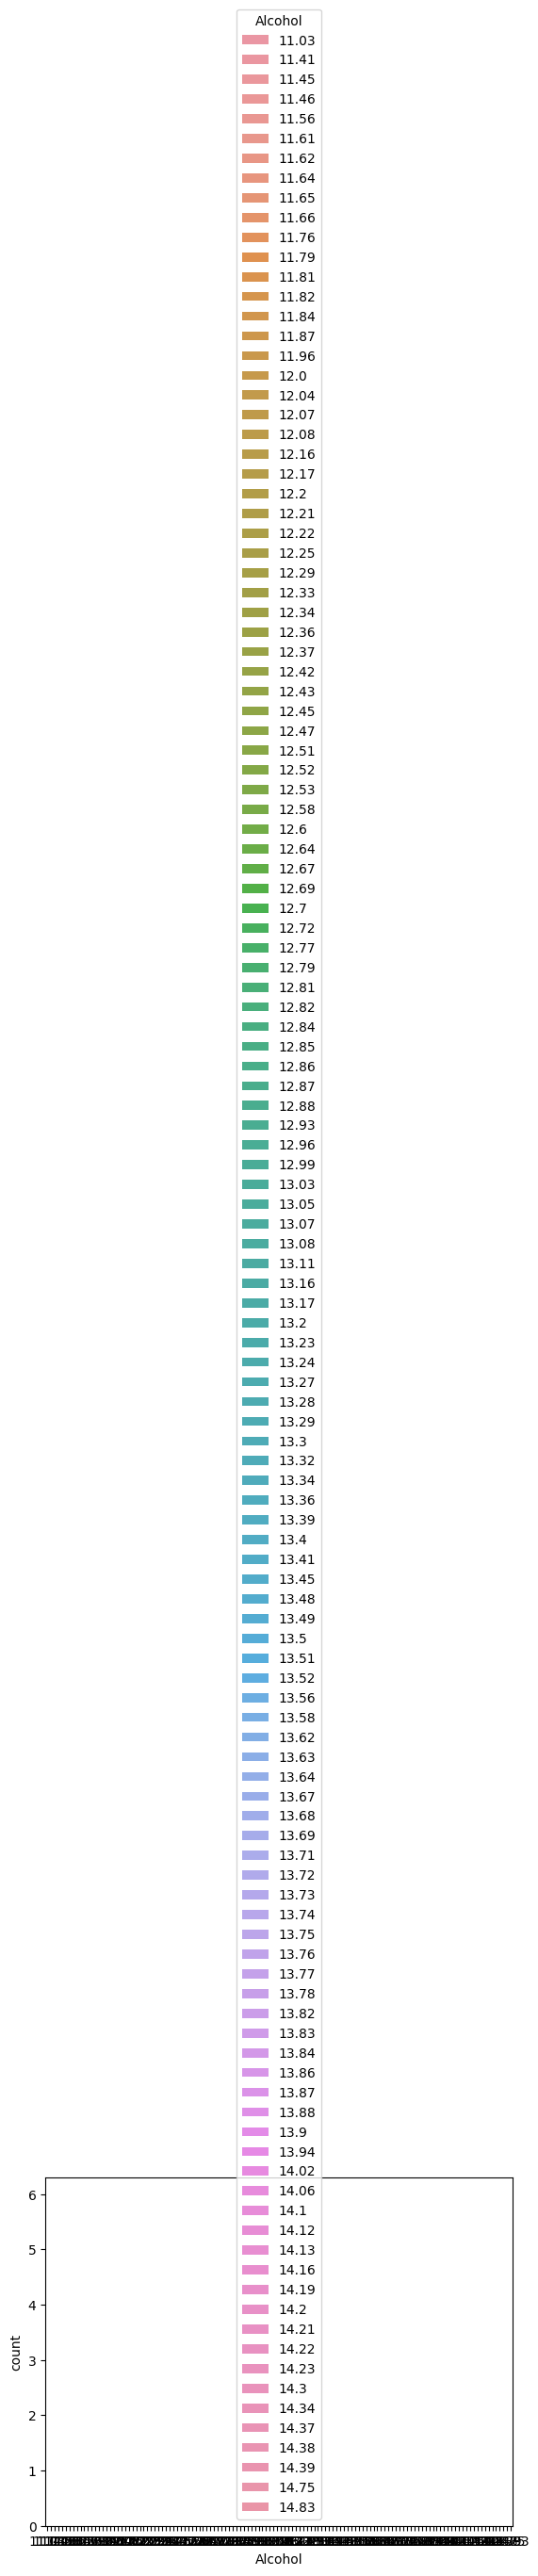

In [104]:
# Visualisasi perbandingan konsentrasi alkohol dalam anggur
sns.countplot(data = df2,x="Alcohol", hue="Alcohol")

Berdasarkan hasil dari data yang ditampilkan, bahwa Visualisasi Comparisont tidak dapat dilakukan dikarenakan dataset berupa angka sehingga tidak adanya perbandingan karena data yang begitu banyak.

####2) Visualisasi Distribution

In [105]:
# Visualisasi Hue (kecerahan warna) dalam anggur
px.histogram(df2,x="Hue")

Dari data yang ditampilkan, Hue dengan kecerahan warna paling tinggi memiliki nilai 1.09 dengan jumlah 34, sedangkan Hue dengan kecerahan warna paling rendah memiliki nilai 1.79 dengan jumlah 1

In [106]:
# Visualisasi tingkat Color intensity (intensitas warna) dalam anggur 
px.histogram(df2,x="Color_Intensity")

Dari data yang ditampilkan, Color intensity (intensitas warna) paling tinggi memiliki nilai 2.5 - 3.49 dengan jumlah 39, sedangkan Color intensity (intensitas warna) paling rendah memiliki nilai 0.5 - 1.49 dengan jumlah 1

In [107]:
# Visualisasi perbandingan Ash dengan Ash_Alcanity
px.histogram(df2,x= "Ash", color="Ash_Alcanity")

Berdasarkan dari data yang ditampilkan, bahwa Visualisasi perbandingan tidak dapat dilakukan dikarenakan dataset berupa angka sehingga tidak adanya perbandingan karena data yang begitu banyak.

In [108]:
# Visualisasi dalam bentuk boxplot Magnesium (konsentrasi magnesium) dalam anggur
px.box(df2, x="Magnesium")

In [109]:
# Visualisasi dalam bentuk boxplot Flavanoids (jumlah flavonoid) dalam anggur
px.box(df2, x="Flavanoids")

####3) Visualisasi Composition

In [110]:
# Visualisai perbandingan
px.pie(df2, names="Proline")

Visualisasi Composition tidak dapat dilakukan dikarenakan dataset berupa angka sehingga tidak adanya perbandingan karena data yang begitu banyak.

## 3.Data Preperation

###a. Select Data

Select data adalah bagian menentukan dataset yang akan digunakan apabila terdapat banyak dataset-nya. **Data utama** yang digunakan bersumber dari tabel wine-clustering.csv

###b. Cleaning Data

Tahapan cleaning data :
1. Datatype
2. Missing value
3. Outlier handling

####1) Datatype

In [111]:
# Cek datatype
df2.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [112]:
# Atau dapat menggunakan sintaks df2.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Dapat dilihat bahwa tipe data yang digunakan adalah float dan int.

####2) Missing Value

In [113]:
# Cek data yang kosong
df2.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [114]:
df2.isnull().any()

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
dtype: bool

In [115]:
null_ratio(df2)

,filled,N null,null_ratio(%)
Alcohol,178,0,0.0
Malic_Acid,178,0,0.0
Ash,178,0,0.0
Ash_Alcanity,178,0,0.0
Magnesium,178,0,0.0
Total_Phenols,178,0,0.0
Flavanoids,178,0,0.0
Nonflavanoid_Phenols,178,0,0.0
Proanthocyanins,178,0,0.0
Color_Intensity,178,0,0.0


Pada data yang ditampilkan dapat dilihat bahwa tidak terdapat data yang kosong, sehingga **Handling Missing Value tidak perlu dilakukan.**

####3) Handling Duplicate Data

In [116]:
df[df.duplicated()]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


####4) Outlier Handling

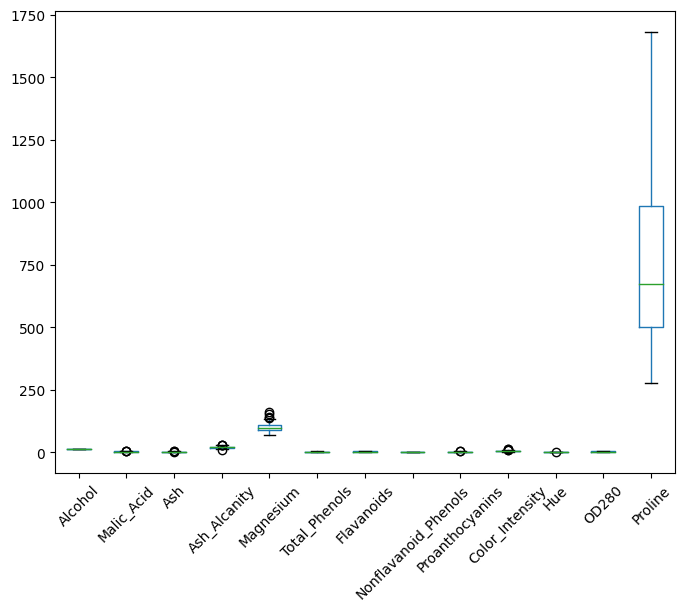

In [117]:
# Cek data outlier 
boxplot = df2.boxplot(grid=False, rot=45, figsize=(8,6))

**Outlier kolom Magnesium**

<Axes: >

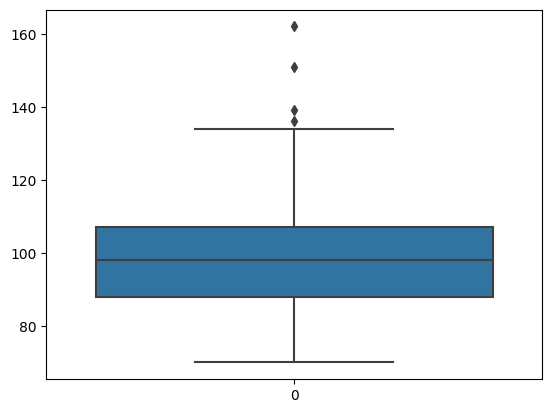

In [118]:
# Kolom Magnesium
sns.boxplot(df2.Magnesium)

Pada data yang ditampilkan terdapat outlier pada kolom Magnesium

In [119]:
# Batas atas = Q3 + (1.5*IQR)
# Batas bawah = Q1 - (1.5*IQR)
# IQR = Q3 - Q1

q3 = df2.Magnesium.quantile(0.75)
q1 = df2.Magnesium.quantile(0.25)

iqr = q3 - q1

ba = q3 + (1.5 * iqr)
bw = q1 - (1.5 * iqr)

In [120]:
# Menampilkan hasil outlier
print(q3,q1,iqr,ba,bw)

107.0 88.0 19.0 135.5 59.5


In [121]:
# Cek outlier
df2[(df2.Magnesium > ba) | (df2.Magnesium < bw)]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [122]:
# Lihat persentase outlier dari jumlah data
10/len(df2) * 100

5.617977528089887

In [123]:
# Karena tidak diatas 5% maka kita bisa hapus datanya
df3 = df2[~(df2.Magnesium > ba) | (df2.Magnesium < bw)]

# Karena diatas 5 jadi tidak perlu menghapus datanya

<Axes: >

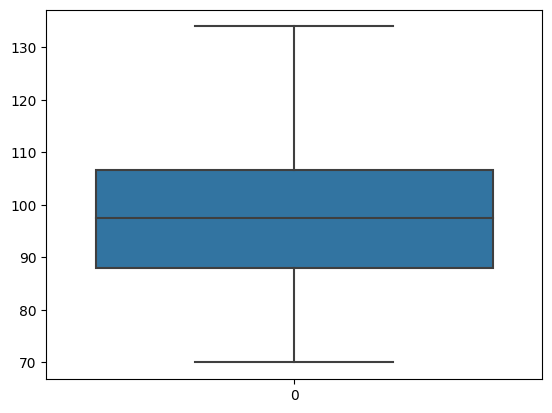

In [124]:
sns.boxplot(df3.Magnesium)

Dari data yang ditampilkan dapat dikatakan bahwa setelah kita lakukan outlier handling data menjadi didalam batas atas dan didalam batas bawah.

####5) Construct Data

1. Hapus kolom yang tidak digunakan

Proses ini tidak dilakukan karena tidak ada kolom yang perlu di hapus

2. Ekstrak kolom-kolom yang ada

Proses ini tidak dilakukan karena tidak ada kolom yang perlu di ekstrak

###c. Integrate Data
Proses ini tidak dilakukan karena tidak ada tabel yang perlu di join dengan tabel utama

###d. Visualisasi Korelasi/Relationship

Proses ini dilakukan setelah tahap **Cleaning Data**

In [125]:
df3.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.081378,0.195529,-0.335518,0.375169,0.288248,0.235135,-0.171155,0.175678,0.541569,-0.059430,0.075126,0.651258
Malic_Acid,0.081378,1.000000,0.145580,0.297910,0.014495,-0.343611,-0.418414,0.282748,-0.193263,0.235743,-0.554711,-0.369255,-0.189661
Ash,0.195529,0.145580,1.000000,0.431211,0.426991,0.111842,0.103641,0.173673,0.059328,0.248391,-0.059127,0.002791,0.227262
Ash_Alcanity,-0.335518,0.297910,0.431211,1.000000,-0.111739,-0.374863,-0.386767,0.393998,-0.199177,0.021987,-0.306390,-0.312595,-0.472175
Magnesium,0.375169,0.014495,0.426991,-0.111739,1.000000,0.241125,0.227376,-0.224801,0.109052,0.316070,-0.032308,0.044949,0.430275
Total_Phenols,0.288248,-0.343611,0.111842,-0.374863,0.241125,1.000000,0.864844,-0.456581,0.651334,-0.053829,0.436407,0.701029,0.496166
Flavanoids,0.235135,-0.418414,0.103641,-0.386767,0.227376,0.864844,1.000000,-0.548854,0.689016,-0.174334,0.551904,0.791351,0.492574
Nonflavanoid_Phenols,-0.171155,0.282748,0.173673,0.393998,-0.224801,-0.456581,-0.548854,1.000000,-0.359380,0.124417,-0.242459,-0.498065,-0.310925
Proanthocyanins,0.175678,-0.193263,0.059328,-0.199177,0.109052,0.651334,0.689016,-0.359380,1.000000,0.013470,0.273084,0.541256,0.334461
Color_Intensity,0.541569,0.235743,0.248391,0.021987,0.316070,-0.053829,-0.174334,0.124417,0.013470,1.000000,-0.512687,-0.427974,0.326348


Dari data yang ditampilkan, jika angka korelasinya mendekati 1 maka korelasinya akan semangin bagus terlihat

<Axes: >

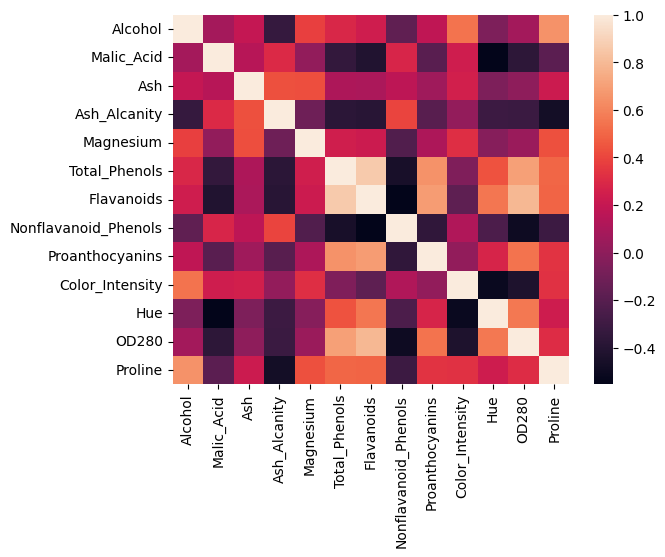

In [126]:
sns.heatmap(df3.corr())

In [127]:
px.imshow(df3.corr())

Jika warnanya semakin terang, maka korelasinya akan semakin kelihatan bagus

###e. Format Data/Preprocessing

1. Encoding
2. Train-test split
3. Cross_validation (optional)



####1) Encoding

In [128]:
df3 = pd.get_dummies(df2)

In [129]:
df3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


####2) Train-test Split

In [130]:
target = df3.Proline
data = df3.drop(columns=["Proline"])

In [131]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [132]:
X_train

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33
97,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07
167,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06


##4. Modelling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

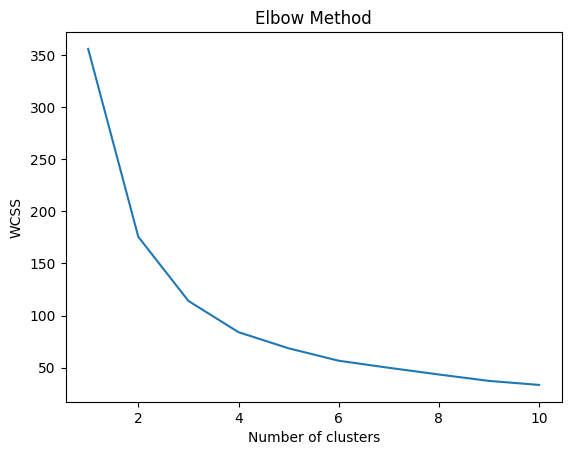

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



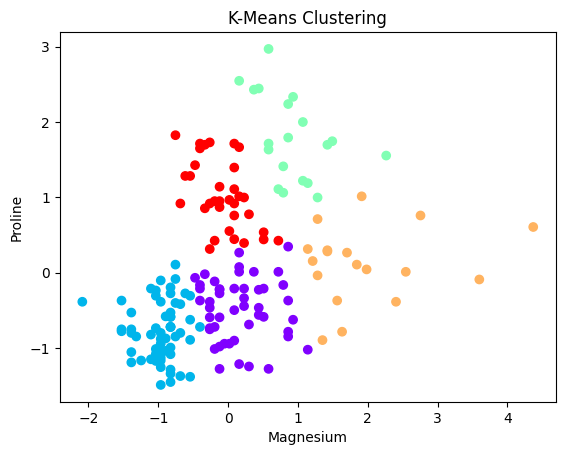

In [133]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Preprocessing
df.dropna(inplace=True)
X = df[['Magnesium', 'Proline']]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Means Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Visualization
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Magnesium')
plt.ylabel('Proline')
plt.show()

Pertama-tama melakukan impor library atau modul yang diperlukan untuk analisis data, yaitu:

1.   pandas yang di impor dengan alias pd, digunakan untuk membaca dan memanipulasi data dalam format tabel.
2.   numpy yang diimpor dengan alias np, digunakan untuk komputasi numerik.
3.   KMeans dari submodul sklearn.cluster, digunakan untuk algoritma clustering K-Means.
4.   StandardScaler dari submodul sklearn.preprocessing, digunakan untuk melakukan standardisasi data.
5.   matplotlib.pyplot yang diimpor dengan alias plt, digunakan untuk memvisualisasikan hasil analisis data.



Setelah itu, dilakukan preprocessing pada data yang dimuat dari file 'wine-clustering.csv'. Data yang memiliki missing values atau nilai yang hilang dihapus dengan menggunakan method dropna(). Selanjutnya, hanya kolom 'Magnesium' dan 'Proline' yang digunakan dalam analisis clustering, dan diambil sebagai variabel independen X.



Agar data dalam skala yang sama dan terstandarisasi, dilakukan scaling atau penyesuaian skala dengan menggunakan StandardScaler(). Hasil scaling disimpan dalam variabel X_scaled.



Untuk menentukan jumlah cluster yang optimal dalam analisis K-Means, dilakukan Elbow Method dengan menghitung nilai Within Cluster Sum of Squares (WCSS) pada setiap nilai k dalam range 1-10. Semakin banyak jumlah cluster yang dipilih, semakin kecil nilai WCSS nya. Namun, terdapat titik di mana penurunan nilai WCSS tidak sebesar sebelumnya dan membentuk kurva seperti siku, disebut elbow. Titik siku tersebut menunjukkan jumlah cluster optimal. Grafik hasil Elbow Method ditampilkan dengan plt.plot().



Setelah jumlah cluster yang optimal ditentukan, dilakukan K-Means Clustering dengan memilih n_clusters=5 pada variabel kmeans. Model K-Means kemudian dilatih dengan menggunakan data yang telah discaling X_scaled.



Untuk memvisualisasikan hasil clustering, digunakan scatter plot dengan plt.scatter(). Setiap titik pada grafik merepresentasikan satu data pada variabel X_scaled. Warna dari setiap titik sesuai dengan label dari hasil clustering yang didapat pada kmeans.labels_. Variabel independen 'Magnesium' dan 'Proline' digunakan sebagai sumbu x dan y pada grafik. Grafik yang dihasilkan akan memberikan gambaran visualisasi dari hasil clustering pada data wine-clustering.

## Analisis Cluster

In [134]:
def plot_cluster(cluster_df):
    plot, ax = plt.subplots(3,4,figsize=(55,15),constrained_layout=True)
    cols = ['Malic_Acid', 'Ash', 'Ash_Alcanity']
    category_counts = cluster_df['Magnesium'].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax[2][2])
    for i,col in enumerate(cols):
        sns.histplot(data=cluster_df, x=col, ax=ax[0][i], kde=True)
        sns.boxplot(data=cluster_df, x=col, ax=ax[1][i])
    sns.countplot(data=cluster_df, x="Malic_Acid", ax=ax[2][0])
    sns.countplot(data=cluster_df, x="Ash_Alcanity", ax=ax[2][1])
    sns.countplot(data=cluster_df, x="Ash", ax=ax[2][3])

Fungsi plot_cluster digunakan untuk membuat visualisasi grafik berupa histogram, boxplot, dan countplot untuk setiap fitur pada dataset yang sudah dibagi ke dalam masing-masing cluster

Untuk menjelaskan tiap tiap cluster

In [135]:
# Load and preprocess the data
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('wine-clustering.csv')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the KMeans model and predict clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
X_train_decoded = pd.DataFrame(scaler.inverse_transform(X_train_scaled), columns=X_train.columns)
X_train_decoded['cluster'] = kmeans.predict(X_train_scaled)

# Split the data into three clusters

cluster1 = X_train_decoded[X_train_decoded['cluster'] == 0]
cluster2 = X_train_decoded[X_train_decoded['cluster'] == 1]
cluster3 = X_train_decoded[X_train_decoded['cluster'] == 2]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [136]:
cluster1.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,cluster
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,13.710250,2.003500,2.465250,17.600000,110.475000,2.90225,3.065250,0.303500,2.000500,5.411750,1.075250,3.194000,0.0
std,0.627953,0.658244,0.265764,4.046714,14.484275,0.36342,0.505655,0.081698,0.434706,1.329347,0.129238,0.356225,0.0
min,11.560000,1.430000,2.040000,11.200000,86.000000,2.20000,2.270000,0.170000,1.250000,2.600000,0.820000,2.570000,0.0
25%,13.277500,1.677500,2.287500,15.900000,101.750000,2.63750,2.727500,0.247500,1.712500,4.470000,1.017500,2.870000,0.0
50%,13.795000,1.790000,2.415000,16.900000,107.500000,2.95000,2.980000,0.290000,1.970000,5.325000,1.070000,3.185000,0.0
75%,14.105000,1.982500,2.627500,19.000000,118.000000,3.10000,3.337500,0.340000,2.150000,6.147500,1.137500,3.455000,0.0
max,14.830000,3.990000,3.230000,30.000000,162.000000,3.88000,5.080000,0.500000,3.280000,8.900000,1.360000,4.000000,0.0


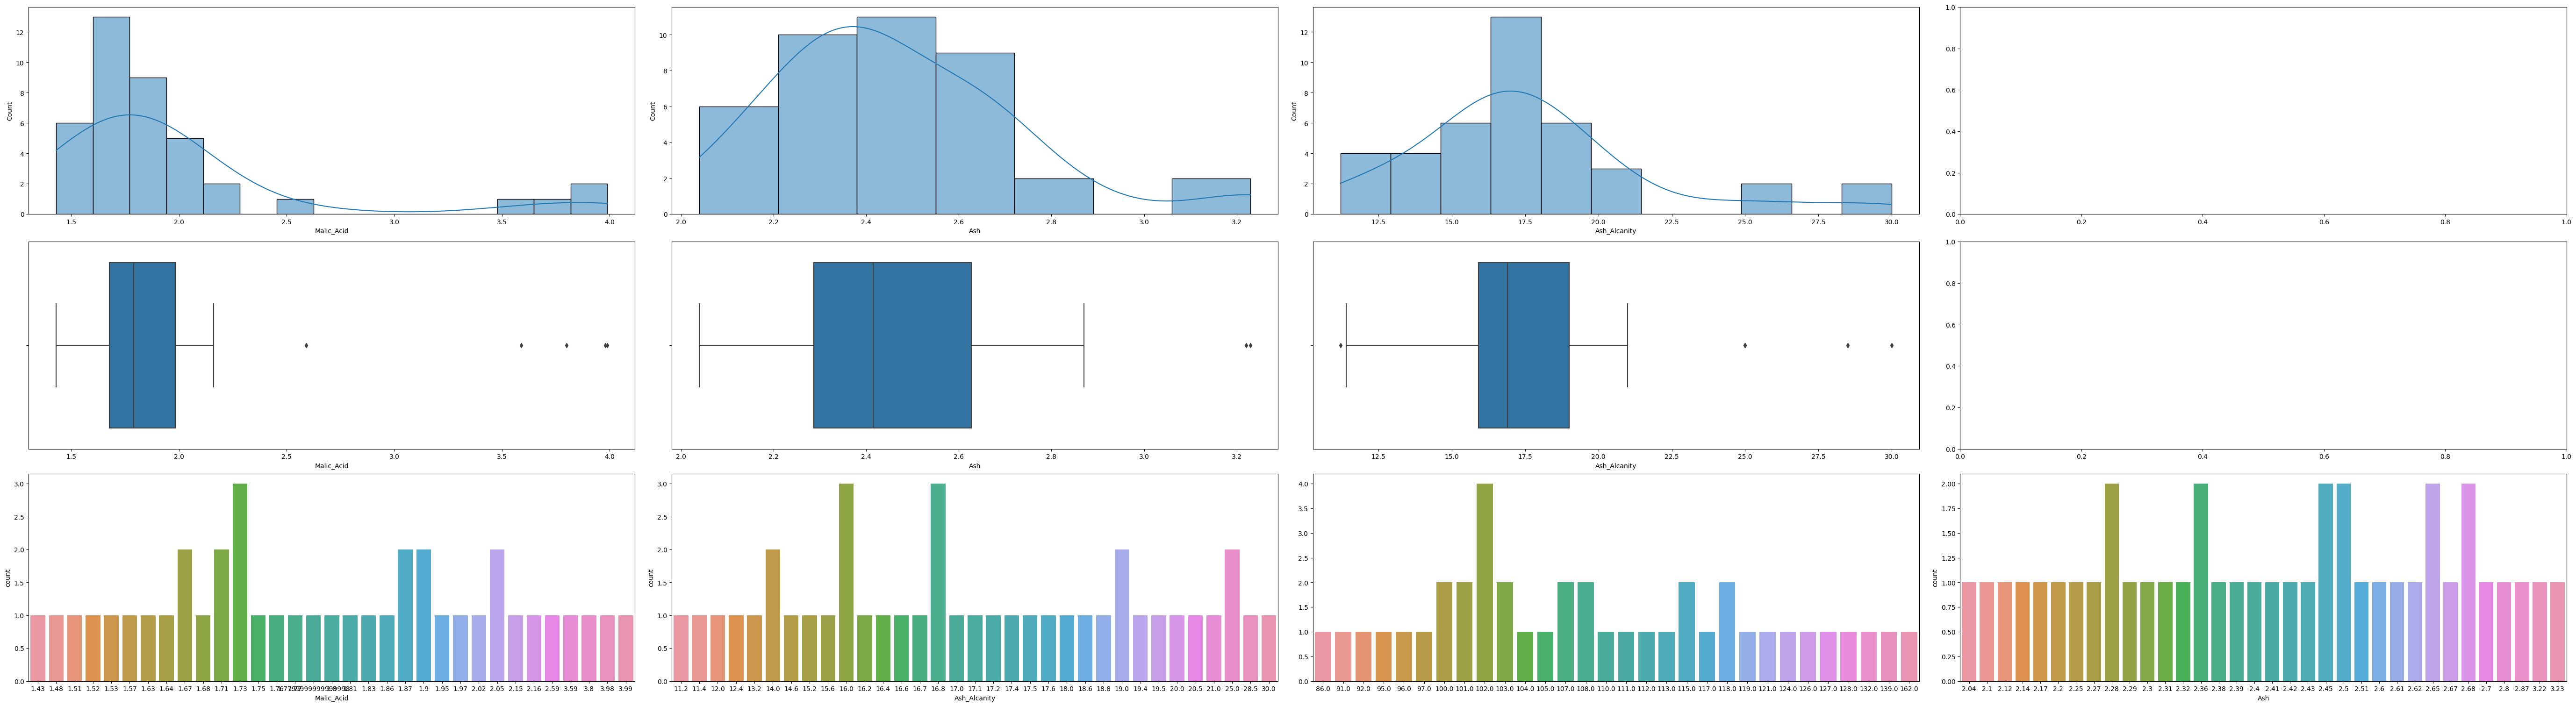

In [137]:
# Menampilkan distribusi dari cluster1
plot_cluster(cluster1)

In [138]:
# Menampilkan deskripsi statistik dari cluster 2
cluster2.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,cluster
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,13.071429,3.358000,2.419429,21.180000,99.657143,1.651429,0.822571,0.446000,1.092000,7.129143,0.699143,1.642857,1.0
std,0.537161,1.064861,0.171909,2.356193,11.300554,0.311431,0.322667,0.128526,0.300439,2.057322,0.126569,0.243668,0.0
min,12.200000,1.240000,2.020000,16.800000,80.000000,0.980000,0.340000,0.170000,0.550000,3.850000,0.480000,1.270000,1.0
25%,12.745000,2.630000,2.320000,19.750000,90.000000,1.445000,0.600000,0.395000,0.835000,5.425000,0.600000,1.475000,1.0
50%,12.960000,3.270000,2.380000,21.000000,97.000000,1.650000,0.700000,0.470000,1.060000,7.100000,0.670000,1.620000,1.0
75%,13.485000,4.000000,2.540000,22.500000,106.500000,1.815000,1.005000,0.530000,1.305000,8.835000,0.770000,1.775000,1.0
max,14.160000,5.650000,2.750000,27.000000,122.000000,2.320000,1.590000,0.630000,1.620000,10.800000,0.980000,2.150000,1.0


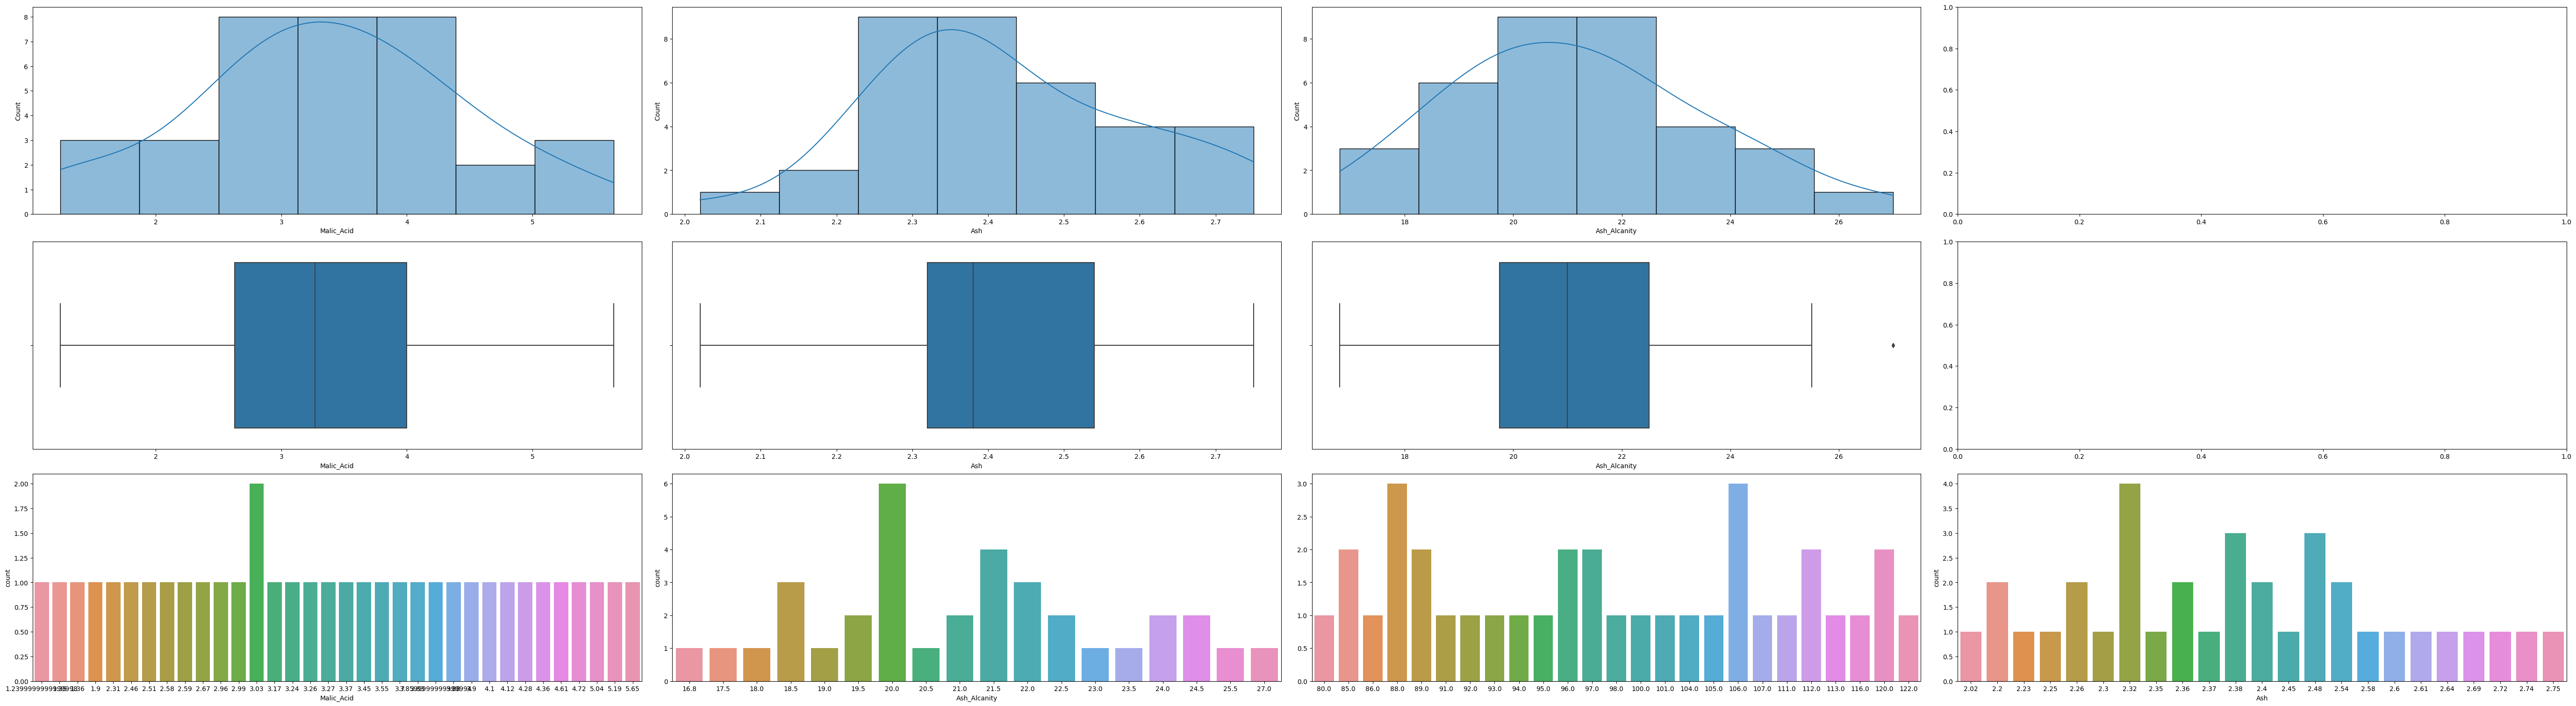

In [139]:
# Menampilkan deskripsi statistik dari cluster 2
plot_cluster(cluster2)

In [140]:
# Menampilkan deskripsi statistik dari cluster 3
cluster3.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,cluster
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.00000,44.000000,44.000000,44.0
mean,12.219091,2.034545,2.249773,20.100000,93.068182,2.209773,2.007500,0.353864,1.609545,3.00000,1.052864,2.804545,2.0
std,0.557690,1.024181,0.291280,2.914838,13.811687,0.568079,0.598483,0.127684,0.563209,0.66405,0.223132,0.449679,0.0
min,11.030000,0.890000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.420000,1.74000,0.690000,1.820000,2.0
25%,11.820000,1.465000,2.127500,18.000000,86.000000,1.772500,1.607500,0.270000,1.350000,2.59250,0.899500,2.490000,2.0
50%,12.165000,1.695000,2.265000,20.200000,88.000000,2.165000,2.030000,0.340000,1.495000,2.90000,1.010000,2.820000,2.0
75%,12.472500,2.220000,2.420000,21.525000,98.000000,2.570000,2.447500,0.430000,1.770000,3.45000,1.222500,3.132500,2.0
max,13.670000,5.800000,2.920000,28.500000,151.000000,3.500000,3.150000,0.660000,3.580000,4.45000,1.710000,3.640000,2.0


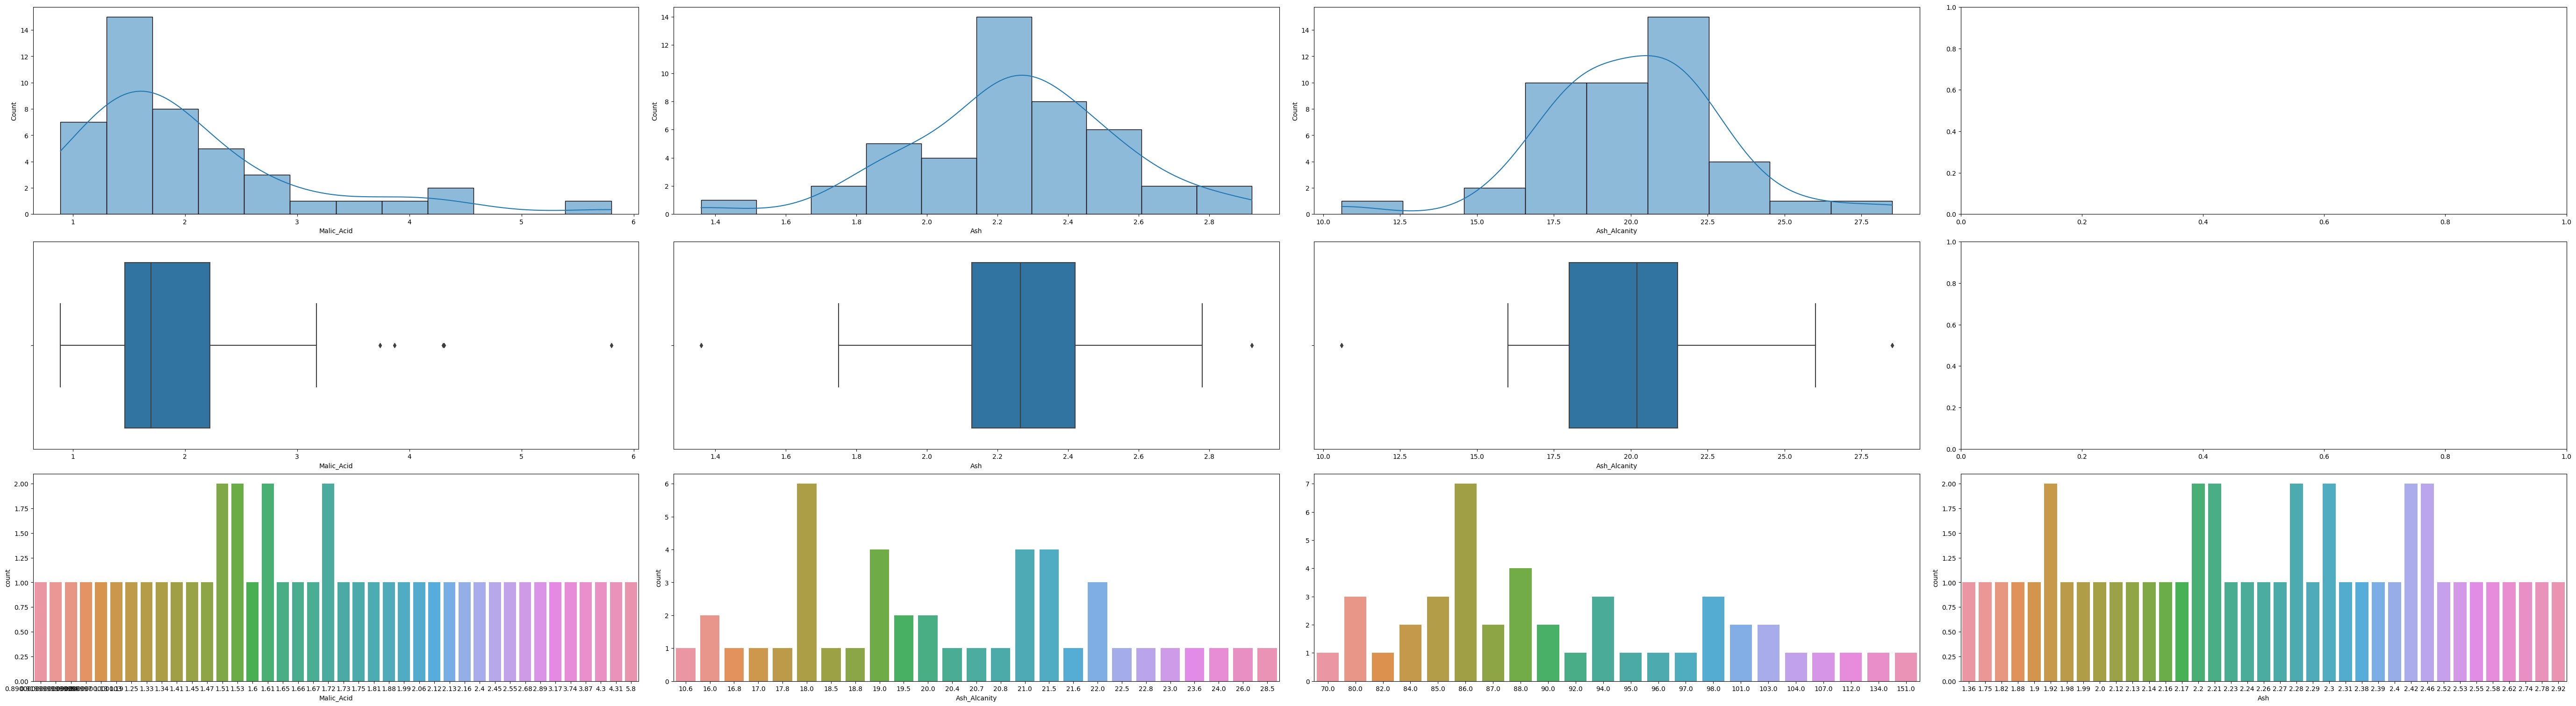

In [141]:
# Menampilkan distribusi dari cluster3
plot_cluster(cluster3)

##5.Evaluation

In [142]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('wine-clustering.csv')

pandas merupakan library yang digunakan untuk memanipulasi dan menganalisis data, biasanya digunakan untuk membaca file seperti CSV atau TSV, melakukan cleaning data dan mengubah format data menjadi DataFrame atau Series.


sklearn (Scikit-learn) merupakan library untuk machine learning yang memiliki berbagai tools untuk preprocessing data, modeling dan evaluasi.


Selanjutnya, dataset yang digunakan pada kode di atas adalah wine-clustering.csv, kemudian di-load menggunakan pandas dengan perintah pd.read_csv(). Dataset tersebut akan dijadikan sebagai objek DataFrame pada variabel df.

###a. Evaluate Results

In [143]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Prediksi cluster pada data train
labels_train = kmeans.predict(X_train_scaled)
X_train['cluster'] = labels_train

# Menghitung nilai Silhouette Score
silhouette_avg = silhouette_score(X_train.drop('cluster', axis=1), labels_train)

# Menghitung nilai Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_train.drop('cluster', axis=1), labels_train)

# Menghitung nilai Davies-Bouldin Index
db_score = davies_bouldin_score(X_train.drop('cluster', axis=1), labels_train)

# Create dataframe for metrics and scores
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores = [silhouette_avg, ch_score, db_score]
df_scores = pd.DataFrame({'Metric': metrics, 'Score': scores})

# reset index dataframe
df_scores = df_scores.reset_index(drop=True)

# ubah nama axis pada index dan kolom
df_scores = df_scores.rename_axis('', axis=0).rename_axis('Metrics', axis=1)

# Display dataframe as table without index column
display(df_scores.style.hide_index())




<ipython-input-143-35937547a5c9>:28: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`



Metric,Score
Silhouette Score,0.056580
Calinski-Harabasz Score,18.913916
Davies-Bouldin Score,2.288622


##6.Deployment

In [144]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Preprocessing
df = df[['Flavanoids', 'Alcohol', 'Magnesium']]
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['Flavanoids', 'Alcohol'])
X = df.drop(['Magnesium'], axis=1)
y = df['Magnesium']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)



RMSE: 16.398658474766137


Melakukan analisis regresi linier untuk memprediksi nilai 'Magnesium' berdasarkan fitur 'Flavanoids' dan 'Alcohol'.


1. Preprocessing: Kode hanya memilih kolom 'Flavanoids', 'Alcohol', dan 'Magnesium' dari kumpulan data dan menghapus setiap baris dengan nilai yang hilang. Itu juga mengubah variabel kategori 'Flavanoids' dan 'Alcohol' menjadi variabel dummy menggunakan fungsi pd.get_dummies() . Dataset yang dihasilkan dibagi menjadi fitur input (X) dan variabel output (y).


2. Train-Test Split: Dataset dibagi secara acak menjadi set pelatihan dan pengujian menggunakan fungsi train_test_split() dari scikit-learn. Set pengujian adalah 20% dari total dataset.


3. Model Regresi Linear: Kode membuat instance kelas LinearRegression dari scikit-learn dan menyesuaikan model dengan data pelatihan menggunakan fungsi fit().


4. Predict: Model ini digunakan untuk memprediksi variabel output ('Magnesium') untuk set pengujian menggunakan fungsi predict().


5. Evaluasi: Mean squared error (MSE) antara nilai prediksi dan aktual 'Magnesium' dihitung menggunakan fungsi mean_squared_error() dari scikit-learn. Root mean squared error (RMSE) dihitung dengan mengambil akar kuadrat dari MSE. RMSE dicetak sebagai hasil akhir dari kode.